<a href="https://colab.research.google.com/github/harsha361/pytorch_classification_neuralnetworks-linear-and-nonlinear/blob/main/pytorch_classification_neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

In [47]:
nsamples=1000
X,y=make_circles(nsamples,noise=0.03,random_state=42)
X[:5],y[:5]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [48]:
circles=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head()
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

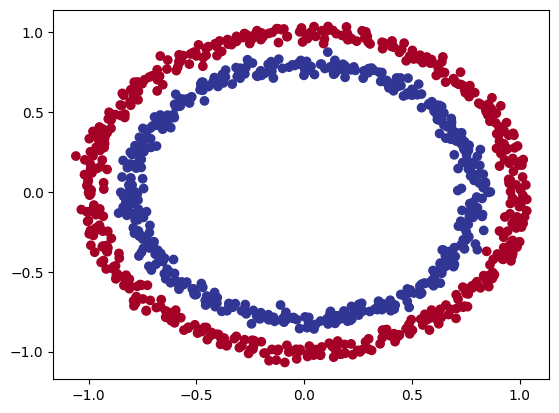

In [49]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [50]:
X.shape,y.shape

((1000, 2), (1000,))

In [51]:
X_sample=X[0]
y_sample=y[0]
X_sample,y_sample

(array([0.75424625, 0.23148074]), 1)

In [52]:
type(X)


numpy.ndarray

In [53]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [54]:
type(X)

torch.Tensor

In [55]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
class circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_1=nn.Linear(in_features=2,out_features=5)
    self.linear_2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
      return self.linear_2(self.linear_1(x))
model0=circlemodel()


In [57]:
unpredres=model0(Xtest)
unpredres[:10]


tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)

In [58]:
#creating a lossfunction and an optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [59]:
#caluclating accuracy
def accuracy_fn(ytrue,ypred):
  correct=torch.eq(ytrue,ypred).sum().item()
  acc=(correct/len(ypred))*100
  return acc

In [60]:
ylogits=model0(Xtest)
ylogits[:5]

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], grad_fn=<SliceBackward0>)

In [61]:
ypredprobs=torch.sigmoid(ylogits)
ypredprobs[:5]
ypreds=torch.round(ypredprobs)
print(torch.eq(ypreds.squeeze(),ypreds.squeeze()))
ypreds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [62]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model0.train()
  #forward pass
  ylogits=model0(Xtrain).squeeze()
  ypred=torch.round(torch.sigmoid(ylogits))
  #caluclate loss
  loss=loss_fn(ylogits,ytrain)
  acc=accuracy_fn(ytrue=ytrain,ypred=ypred)
  #optimizing zero grad

  optimizer.zero_grad()
  #loss backwards
  loss.backward()
  #optimizer step
  optimizer.step()
  model0.eval()
  with torch.inference_mode():
    testlogits=model0(Xtest).squeeze()
    testpred=torch.round(torch.sigmoid(testlogits))
    #caluclate loss/accuracy
    testloss=loss_fn(testlogits,ytest)
    testacc=accuracy_fn(ytrue=ytest,ypred=testpred)

    if epoch%10==0:
      print(f"Epoch:{epoch}| Loss:{loss:5f},Accuracy:{acc:.2f}%,testloss:{testloss:.5f},testaccuracy:{testacc:.2f}%")



Epoch:0| Loss:0.695685,Accuracy:50.00%,testloss:0.69721,testaccuracy:50.00%
Epoch:10| Loss:0.694026,Accuracy:50.00%,testloss:0.69615,testaccuracy:50.00%
Epoch:20| Loss:0.693428,Accuracy:46.00%,testloss:0.69585,testaccuracy:48.50%
Epoch:30| Loss:0.693207,Accuracy:49.00%,testloss:0.69577,testaccuracy:47.50%
Epoch:40| Loss:0.693120,Accuracy:49.50%,testloss:0.69573,testaccuracy:46.50%
Epoch:50| Loss:0.693081,Accuracy:50.38%,testloss:0.69569,testaccuracy:46.50%
Epoch:60| Loss:0.693061,Accuracy:50.50%,testloss:0.69564,testaccuracy:46.50%
Epoch:70| Loss:0.693047,Accuracy:50.50%,testloss:0.69559,testaccuracy:46.50%
Epoch:80| Loss:0.693037,Accuracy:50.75%,testloss:0.69553,testaccuracy:46.50%
Epoch:90| Loss:0.693029,Accuracy:50.38%,testloss:0.69547,testaccuracy:46.50%


In [63]:
import requests
from pathlib import Path

In [64]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


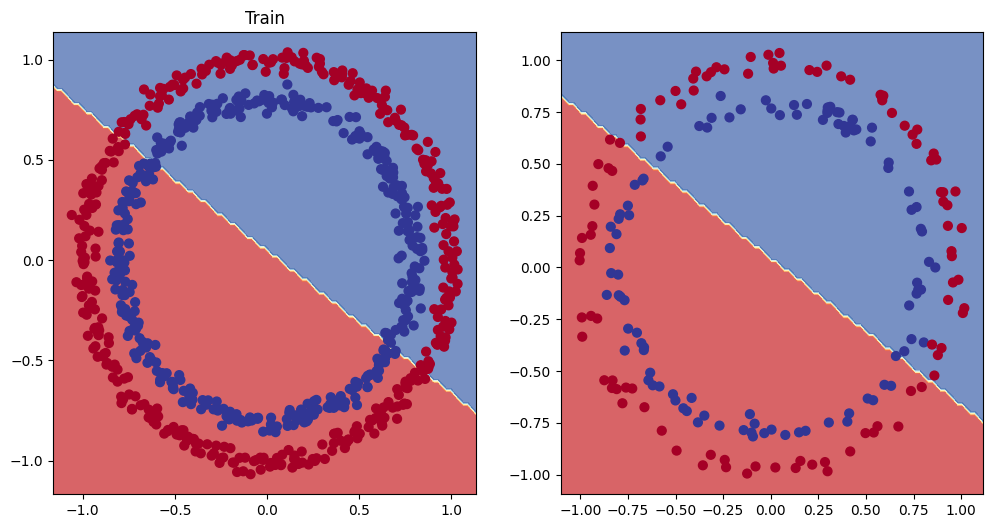

In [65]:
#plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model0,Xtrain,ytrain)
plt.subplot(1,2,2)
plot_decision_boundary(model0,Xtest,ytest)


In [71]:
#building the model with nonlinearity
from torch import nn
class circlemodel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1=nn.Linear(in_features=2,out_features=10)
    self.lin2=nn.Linear(in_features=10,out_features=10)
    self.lin3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
    self.relu(self.lin1(x))
    self.relu(self.lin2(x))
    self.lin3(x)
    return x


model2=circlemodel2()
print(model2)




circlemodel2(
  (lin1): Linear(in_features=2, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=10, bias=True)
  (lin3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [81]:
#training the nonlinear model.
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
  #forward pass
  ylogits=model2(Xtrain).squeeze()
  ypred=torch.round(torch.sigmoid(ylogits))
  #calculate loss
  loss=loss_fn(ypred,ytrain)
  acc=accuracy_fn(ytrue=ytrain,ypred=ypred)
  #optimizer Zero grad
  optimizer.zero_grad()
  #lossbackward
  loss.backward()
  #optimizer step
  optimizer.step()
  ###testing
  model2.eval()
  with torch.inference_mode():
    testlogits=model2(Xtest).squeeze()
    testpred=torch.round(torch.sigmoid(testlogits))
    ##loss and accuracy calculation
    testloss=loss_fn(testlogits,ytest)

    testacc=accuracy_fn(ytrue=ytest,ypred=testpred)
    ##print out what's happening
    if epoch%100==0:
      print(f"epoch:{epoch} | loss:{loss:.5f} |testloss:{testloss:.2f}%,testaccuracy:{testacc:.2f}%")






epoch:0 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:100 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:200 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:300 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:400 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:500 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:600 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:700 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:800 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%
epoch:900 | loss:0.81326 |testloss:0.69%,testaccuracy:50.00%


In [68]:
 print(Xtest.shape)
 print(ytest.shape)

torch.Size([200, 2])
torch.Size([200])


In [78]:
Xtrain.shape

torch.Size([800, 2])

In [80]:
from torch import nn

class circlemodel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(in_features=2, out_features=10)
        self.lin2 = nn.Linear(in_features=10, out_features=10)
        self.lin3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.lin1(x))
        x = self.relu(self.lin2(x))
        x = self.lin3(x)
        return x

# Create an instance of the model
model2 = circlemodel2()
print(model2)


circlemodel2(
  (lin1): Linear(in_features=2, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=10, bias=True)
  (lin3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
